![logo](../img/LogoLine_horizon_C3S.png)

# Calculation of global climatology and annual cycles of Cloud Fractional Cover from EUMETSAT's CM SAF CLARA-A3 dataset

## 1. Introduction

This notebook provides you with an introduction to one variable of the **EUMETSAT's CM SAF CLARA-A3** dataset available at the [Climate Data Store](https://cds.climate.copernicus.eu/#!/home) (CDS). The overall dataset contains data for Essential Climate Variables (ECVs) _Cloud Properties_ as well as _Surface_ - and _Earth Radiation Budget_, while this notebook focuses on **Cloud Fractional Cover** as part of the ECV _Cloud Properties_ available here: [Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-cloud-properties?tab=overview).

In addition, the tutorial is about the **Surface downwelling longwave/shortwave flux** (as part of the ECV _Surface Radiation Budget_) to demonstrate the relation between clouds and radiation. The data is also available at the CDS: [Surface radiation budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-surface-radiation-budget?tab=overview).

The tutorial covers the full process from scratch to end and starts with a short introdution to the dataset and how to access the data from the Climate Data Store of the Copernicus Climate Change Service (C3S). This is followed by a step-by-step guide on how to process and visualize the data. Once you feel comfortable with the python code, you are invited to adjust or extend the code according to your interests! After a short introduction about how to use a Jupyter notebook the analysis starts!

![Overview](./images/cloud-cover-overview.png)

**Figure 1:** Summary of following options for analysis of a cloud and radiation dataset: Climatology of cloud fractional cover (a), annual cycle of cloud fractional cover for three selected cities (b) and climatology of surface downwelling longwave radiation (c); each based on the CLARA-A3 dataset and data from 1979 - 2020.

### How to access the notebook

This tutorial is in the form of a [Jupyter notebook](https://jupyter.org/). It can be run on a cloud environment, or on your own computer. You will not need to install any software for the training as there are a number of free cloud-based services to create, edit, run and export Jupyter notebooks such as this. Here are some suggestions (simply click on one of the links below to run the notebook):

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/copernicus-training-c3s/blob/main/ecv-notebooks/erb-outgoing-longwave-radiation.ipynb">
        <img src = "https://kaggle.com/static/images/open-in-kaggle.svg" alt = "Kaggle"></th>
    <th><a href="https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training-c3s/main?labpath=ecv-notebooks/erb-outgoing-longwave-radiation.ipynb">
        <img src = "https://mybinder.org/badge.svg" alt = "Binder"></th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/copernicus-training-c3s/blob/main/ecv-notebooks/erb-outgoing-longwave-radiation.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
  </tr>
</table>
<br>

If you would like to run this notebook in your own environment, we suggest you install [Anaconda](https://docs.anaconda.com/anaconda/install/), which contains most of the libraries you will need. You will also need to install [Xarray](http://xarray.pydata.org/en/stable/) for working with multidimensional data in netcdf files, and the CDS API (`pip install cdsapi`) for downloading data programatically from the CDS.

### Outline

These include a brief introduction into the variables followed by a step-by-step guidance how to retrieve the data. With this done the focus is on analysing and visualising the data in various ways.

1. Introduction
2. Retrieve data
3. Visualisation of mean global cloud distribution
    - Calculation of the temporal average of cloud fractional cover
    - Plot of the temporal average of cloud fractional cover
4. Visualisation of seasonal variations of clouds
    - Calculation and Plot of cloud coverage annual cycles on three different spots
5. Visualisation of radiative effects of clouds
    - Download and calculation of temporal average of surface downwelling longwave/shortwave radiation
    - Plot of the temporal average of surface downwelling longwave/shortwave radiation
6. References


### Rationale

This tutorial is about cloud and radiation parameters of EUMETSAT's CM SAF CLARA-A3 dataset. It covers step by step the process from retrieving the data to the processing and finally the visualisation of the results.

The CLARA-A3 dataset provides information of various Cloud Properties parameters as well as Surface Radiation Budget (SRB) and Earth Radiation Budget (ERB) parameters. Each ECV is covered by an own Jupyter Notebook (please also take a look at [CLARA-A3 SRB](https://ecmwf-projects.github.io/copernicus-training-c3s/intro.html) and [CLARA-A3 ERB](https://ecmwf-projects.github.io/copernicus-training-c3s/intro.html)).

This notebook focuses on the Cloud Fractional Cover (CFC) as well as Surface Downwelling Longwave and Surface Incoming Shortwave Radiation (SDL and SIS, respectively) as an extra feature to demonstrate the connection between clouds and radiation. A first Use Case provides a general idea how clouds are distributed all over the globe (averaged for the time period of 1979-2020). A second Use Case provides a closer look on three selected locations and their corresponding annual cycles in terms of cloud coverage. Those locations are defined by their geographical coordinates. Feel free to change the code and investigate the cloud coverage at more locations of your interest! To sum it up and link to the connection between clouds and radiation, a third Use Case covers two radiation parameters and focuses on climatologies of Surface Downwelling Longwave and Surface Incoming Shortwave Radiation.  

The CLARA-A3 dataset is the successor of CLARA-A2.1 and comprises more than 44 years (Latest status: 02/2024) of continuous observations of clouds from space, thereby monitoring their spatial and temporal variability on Earth. CLARA-A3 comes not just with a temporal extension, but also with significant algorithm, calibration and product improvements.

As measurements cover the entire globe and time-coverage has reached climatological timescales by now, the dataset is first and foremost well suited to analyse long-term characteristics and climatological trends of clouds.

Questions about the cloud distribution and trends are crucial as clouds play a decisive role in the Earth's climate system: They produce precipitation and strongly interact with radiation, thereby define the Earth's temperature. Therefore, the CLARA-A3 climatology might be useful to e.g. determine the radiative effects of clouds on climate and to study to what extent changes in the Earth's radiation budget can be attributed to changes in clouds. Furthermore it can be used as reference to assess e.g. the prediction of clouds by climate and forecast models.

As clouds strongly shield sunlight from the Earth's surface, the above mentioned points might also concern, among others, the solar energy industry as well as tourism. Some regions are more suited for allocating photovoltaic power plants or spending holidays with nice weather conditions.

In the following, some simple illustrations are presented to prompt ideas on the usage, visualisation and analysis of the CLARA-A3 dataset. It comprises several variables to capture various cloud and radiation characteristics.

### Dataset description

Please find further information about the datasets as well as the data in the Climate Data Store sections "Overview", "Download data" and "Documentation": 

* Cloud Properties: [Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-cloud-properties?tab=overview)

In addition:
* Surface Radiation Budget: [Surface radiation budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-surface-radiation-budget?tab=overview)
* Earth Radiation Budget: [Earth's radiation budget from 1979 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-earth-radiation-budget?tab=overview)

The _Overview_ section provides you with a general introduction to clouds and their role in the atmosphere. In addition, information on the available datasets are provided in the form of overview texts as well as general facts about coverage, resolution, etc. in a table.

The _Download data_ section provides you with the download form and access to the data.

The _Documentation_ section contains useful documents e.g. description of retrieval algorithms, validation and user manual.

A [tutorial video](https://datastore.copernicus-climate.eu/documents/satellite-cloud-properties/C3S2_312a_Lot1.4.0.3_202306_Tutorial_ECV_CloudProperties_final.mp4) describes the ECV _Cloud Properties_ and its impact on the atmospheric conditions. In addition, it provides you with a small introduction of the satellite instruments and retrieval methods followed by general information about the dataset and support options provided by the CDS. 

## 2. Retrieve data

This tutorial assumes that you have installed the cdsapi and configured you .cdsapirc file with your key, as described in the "Climate Data Store Tutorial".

### Import libraries

Processing (climate) data with python requires some libraries. Libraries contain different functions for e.g. reading, processing and visualisation of large amounts of data and make it easier to work with it.

The basic data format for climate data is NetCDF. This is also the case for CLARA-A3 and to handle this well we use a library to work with multidimensional arrays, named **Xarray**. For the calculations we use **Numpy**, which provides various mathmatical operations. We also need libraries for plotting and viewing the data, in this case we will use **Matplotlib** and **Cartopy**.

Before we start analysing the data we need to take advantage of one of the two options to get the data:

* Fill in the download form on the CDS page and simply download the data to the download folder of your computer - _not preferred_
* Use the API (Application Programming Interface) for programmatic access to the CDS data - _preferred_, check [Chapter 2.3 Enter CDS API key](#cds_api_key)

For this we import the **cdsapi**-library and a library to **unzip** the downloaded zip files.

In [2]:
# Download data from CDS via cdsapi
import cdsapi

# Library to work with zip-archives and os (operating system)-functions
import zipfile
import os

# Libraries for data reading and processing
import xarray as xr
import numpy as np

# Libraries for visualisation in form of maps or graphs
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

Next, we specify a data directory (**datadir**) in which we create a **Download** and **Data** folder to save the downloaded zip-file and store the unzipped files. **Data** is separated for **CLD** and **SRB**.

In [4]:
# Definition of the path, datadir is defined as the current directory (./)
datadir = './'

# Definition of path, we aim to create a folder named "Download" in the current directory
download = './Download'

# Creation of the above-defined path
os.makedirs(download, exist_ok=True)

# Same steps for Data and subdirectories CLD and SRB
data = './Data'
os.makedirs(data, exist_ok=True)

CLD = './Data/CLD'
os.makedirs(CLD, exist_ok=True)

SRB = './Data/SRB'
os.makedirs(SRB, exist_ok=True)

### Get the data

For this tutorial we need data for Cloud Properties first, so please either click on "Datasets" in the CDS and search for "Cloud Properties" or simply click on: https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-cloud-properties?tab=overview.
The name of the Cloud Properties landing page is: **Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations**.

Once you reached the landing page, feel free to have a look at the documentation and information provided.

The data can be found in the "Download data"-tab with a form to select certain variables, years etc. For our use case we select as follows:

* Product family: CLARA-A3 (CM SAF cLoud, Albedo and surface RAdiation dataset from AVHRR data)
* Origin: EUMETSAT (European Organisation for the Exploitation of Meteorological Satellites)
* Variable: Cloud fraction 
* Climate data record type: Thematic Climate Data Record (TCDR)
* Time aggregation: Monthly mean
* Year: Every year from 1979-2020 (shortcut with "Select all" at the bottom right)
* Month: Every month from January to December (shortcut with "Select all" at the bottom right)
* Geographical area: Whole available region
* Format: Zip file (.zip)

Please make sure all **Terms of use** are accepted (see at the top of Figure 3). This can be done at the bottom of the **Download data** tab.

At the bottom left of the page, click on **Show API request** and copy & paste the text into the Jupyter notebook.

Note: To make sure the zip-file will be saved in the correct place and with an appropriate name you can adjust the last line like below. The Download folder in the current directory was created before and the download file is named **download_cld_tcdr.zip**.

Note: The download may take a few minutes. Feel free to have a look at the various information on the Cloud Properties page in the CDS or already get familiar with the next steps.

In [5]:
c = cdsapi.Client()

c.retrieve(
    'satellite-cloud-properties',
    {
        'format': 'zip',
        'product_family': 'clara_a3',
        'origin': 'eumetsat',
        'variable': 'cloud_fraction',
        'climate_data_record_type': 'thematic_climate_data_record',
        'time_aggregation': 'monthly_mean',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
    },
    f'{datadir}Download/download_cld.zip')

2024-03-14 13:18:20,909 INFO Welcome to the CDS
2024-03-14 13:18:20,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-cloud-properties
2024-03-14 13:18:21,053 INFO Request is completed
2024-03-14 13:18:21,054 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/dataset-satellite-cloud-properties-4f47b26c-4862-4a94-b781-d1bc69464eea.zip to ./Download/download_cld.zip (2.5G)
2024-03-14 13:22:57,797 INFO Download rate 9.3M/s                                                                                                                                                                                            


Result(content_length=2693649047,content_type=application/zip,location=https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data9/dataset-satellite-cloud-properties-4f47b26c-4862-4a94-b781-d1bc69464eea.zip)

The zip-file should be downloaded and saved at the correct place.

The following lines unzip the data. **datadir + 'Download/download_cld.zip** is the path to the zip-file. The first line constructs a ZipFile() object, the second line applies the function **extractall** to extract the content.

_datadir + '/Data/CLD/'_ is the path we want to store the files.

In [6]:
with zipfile.ZipFile(datadir + '/Download/download_cld.zip', 'r') as zip_ref:
    zip_ref.extractall(datadir + 'Data/CLD/')

With the zip-file unziped and files at the right place we can start reading and processing the data.

The following line starting with "file" considers only files in the given directory starting the "CFCmm" and ending with ".nc" and creates a list with all matching files. The * means "everything" and takes every file into account. This is quite useful since year and month are part of the file names. 

The second line reads the defined file list with the xarray function "open_mfdataset" (mf - multiple file) and concatenates them according to the time dimension.

In [7]:
file = datadir + '/Data/CLD/CFCmm*.nc'
dataset_cfc = xr.open_mfdataset(file, combine='nested', concat_dim='time')

Please find below the xarray dataset of the Cloud Properties exemplary:

It provides information about the:
- Dimensions: Lat and Lon with 0.25°x0.25° resolution and a lenght of 720/1440 and 504 months (42 years * 12 months)
- Coordinates: Spatial coordinates for Latitude and Longitude, temporal coordinates for time
- Data variables: List of different variables (in our case "cfc" is relevant)
- Attributes: Various important information about the dataset

In [8]:
dataset_cfc

<xarray.Dataset>
Dimensions:         (lat: 720, time: 504, bndsize: 2, lon: 1440)
Coordinates:
  * lat             (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon             (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time            (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Dimensions without coordinates: bndsize
Data variables: (12/18)
    lat_bnds        (time, lat, bndsize) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds        (time, lon, bndsize) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    time_bnds       (time, bndsize) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    record_status   (time) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    nobs            (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs_day        (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    cfc_day         (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cfc_night       (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cma_prob        (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cma_prob_day    (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cma_prob_night  (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cfc_unc_mean    (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/37)
    title:                       CM SAF cLoud, Albedo and RAdiation dataset, ...
    summary:                     This file contains AVHRR-based Thematic Clim...
    id:                          DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:             3.0
    creator_name:                DE/DWD
    creator_email:               contact.cmsaf@dwd.de
    ...                          ...
    CMSAF_included_Daily_Means:  31.0
    CMSAF_L1_processor:          PyGAC, level1c4pps
    CMSAF_L2_processor:          PPSv2018-patch5
    CMSAF_L3_processor:          CMSAFGACL3_V3.0
    variable_id:                 cfc
    license:                     The CM SAF data are owned by EUMETSAT and ar...

In advance of the following processing and visualisation part we create a directory where to save the figures. 

The following lines create the directory **Figures** and define the path as **figpath**. 

In [9]:
figures = './Figures'
os.makedirs(figures, exist_ok=True)

figpath = datadir + 'Figures/'

## 3. Visualisation of mean global cloud distribution

Use Case #1 aims to give a general overview about the global distribution of clouds. We therefore use the recently downloaded dataset and plot a map with a temporal average (1979-2020) of the cloud fractional cover (cfc) variable from the CLARA-A3 dataset. 

### Calculation of the temporal average of cloud fractional cover

We therefore calculate the temporal average with the function np.nanmean. np is short for numpy and a library for mathmatical working with arrays. nanmean averages the data and ignores nan's. This operation is applied to dataset_cfc and the variable "cfc". axis=0 averages over the first axis, which is "time" in this case. This leads to a two-dimensional result with an average over time.

In [10]:
# Calculate temporal average
average = np.nanmean(dataset_cfc['cfc'], axis=0)

# Get longitude and latitude coordinates. Both are variables of the dataset and available with
# the ".variables['lat/lon']" function; [:] usually means ["from":"till"] but
# without numbers it means "everything"
lon = dataset_cfc.variables['lon'][:]
lat = dataset_cfc.variables['lat'][:]

### 3.2 Plot of the temporal average of cloud fractional cover

With the caluculation done the data is ready for a plot. Please find the plot and settings in the next section.

Some further notes:
- Matplotlib provides a wide range of colorbars: https://matplotlib.org/stable/users/explain/colors/colormaps.html; the addition <em>_r</em> reverses the colorbar
- The "add_subplot" part provides the option to plot more than one figure (e.g. a 2x2 matrix with four plots together). In this case (1,1,1) means that the panel is a 1x1 matrix and the following plot is the first subplot.

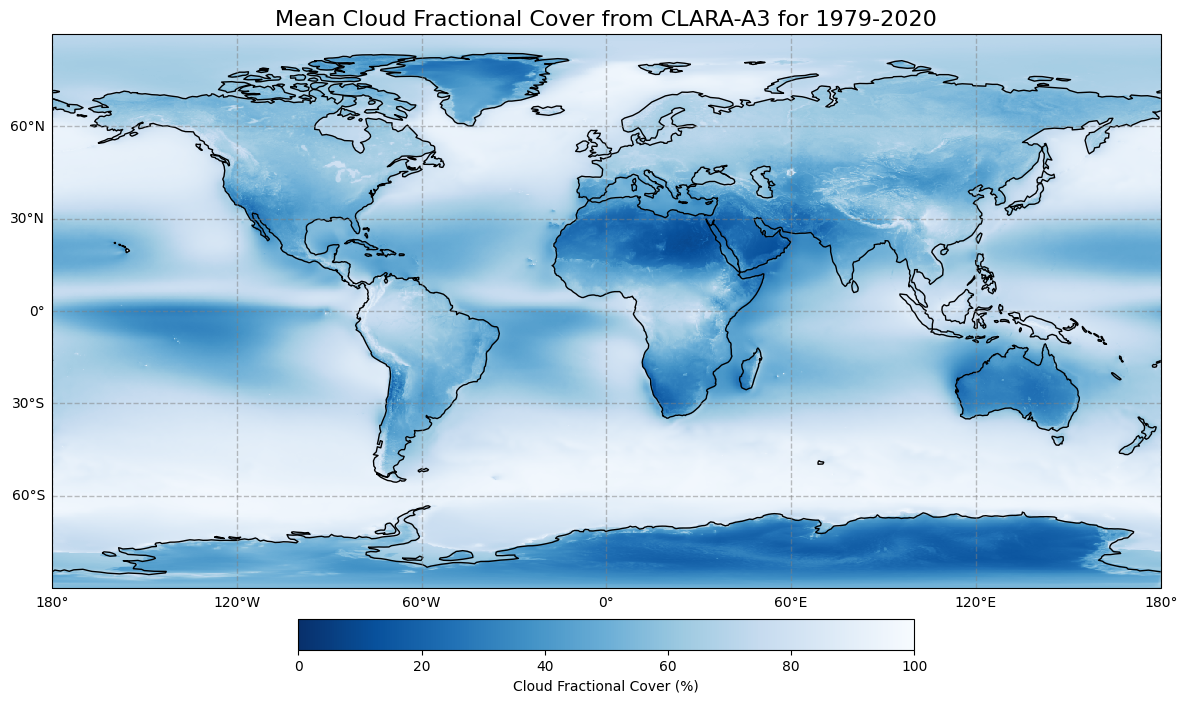

In [11]:
# Create figure and size
fig = plt.figure(figsize=(15, 8))

# Create the figure panel and define the Cartopy map projection (PlateCarree)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the data and set colorbar, minimum and maximum values
im = plt.pcolormesh(lon, lat, average, cmap='Blues_r', vmin=0, vmax=100)

# Set title and size
ax.set_title('Mean Cloud Fractional Cover from CLARA-A3 for 1979-2020', fontsize=16)

# Define gridlines with linewidth, color, opacity and style
gl = ax.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Set x- and y-axis labels to True or False
gl.bottom_labels = True
gl.left_labels = True

# Set coastlines
ax.coastlines()

# Set colorbar and adjust size, location and text
cbar = plt.colorbar(im, fraction=0.05, pad=0.05, orientation='horizontal')
cbar.set_label('Cloud Fractional Cover (%)')

# Save figure in defined path and name
plt.savefig(figpath + 'Cloud_mean.png')

# Show plot and close it afterwards to reduce the amount of storage
plt.show()
plt.close()

**Figure 4:** Global climatology of cloud fractional cover from 1979 - 2020 based on EUMETSAT's CM SAF CLARA-A3 dataset.

Figure 4 shows the time-averaged global distribution of clouds on Earth. It has been calculated as a time average over the monthly mean cloud fractional cover data from 1979-2020 based on the CLARA-A3 dataset. As shown here, especially cloudy regions can be found along the storm tracks of the midlatitudes, which are known for the frequent occurence of cyclones. They typically result in vertical motion of air, a prerequisite for the formation of clouds. High concentrations of clouds also appear in the tropics near the equator, where strong insolation triggers intense convection, thus cloud formation (compare with Inter-Tropical Convergence Zone, ITCZ). The smallest amount are mainly present in the subtropics in Australia, North Africa, Southern Africa, and Soutwest South America, where large-scale downwelling motion generally prevails.

## 4. Visualisation of seasonal variations of clouds

Use Case #2 shows three annual cycles of cloud fractional cover for different locations. As insolation and flow patterns vary significantly over the year in many parts of the Earth, the mean presence of clouds also exhibits seasonal differences. As one example that neatly demonstrates steady variations throughout the year, Use Case #2 shows the mean monthly evolution of the fractional cloud cover for Frankfurt (Germany), Mumbai (India) and Darwin (Australia).

### Calculation and Plot of cloud coverage annual cycles on three different spots

We define three locations of interest in terms of latitude and longitude coordinates. Feel free to discover different locations and change the coordinates according to your interests!
The basic setup consists of Frankfurt (Germany) with a warm and temperate climate of central Europe, Mumbai (India) with its influence of the monsoon and Darwin (Australia) in the tropical savanna climate.

In [12]:
# Frankfurt, Germany
point_lat_1 = 50.11
point_lon_1 = 8.68

# Mumbai, India
point_lat_2 = 19.08
point_lon_2 = 72.88

# Darwin, Australia
point_lat_3 = -12.46
point_lon_3 = 130.84

The following operations are applied on all three points, so we try to make advantage of a loop. A loop runs a defined set of commands a defined number of times. Before we run the loop we define vectors containing the information for all three points. 

In [13]:
# Latitude/Longitude points and labels with index 0 for Frankfurt, 1 for Mumbai and 2 for Darwin
point_lat = [point_lat_1, point_lat_2, point_lat_3]
point_lon = [point_lon_1, point_lon_2, point_lon_3]
label = ['Frankfurt, Germany', 'Mumbai, India', 'Darwin, Australia']

# X-axis values to plot against
year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Now the actual calculation and visualisation takes place. The for-loop defines that the steps will be runned three times (range(0,3) with indices 0, 1 and 2). The first run with index "0" takes the first element of a vector with the addition [i], e.g. point_lat[i] and therefore point_lat_1 (see above).

2024-03-14 13:25:30,948 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-14 13:25:30,951 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-14 13:25:30,954 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-14 13:25:52,557 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-14 13:25:52,560 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

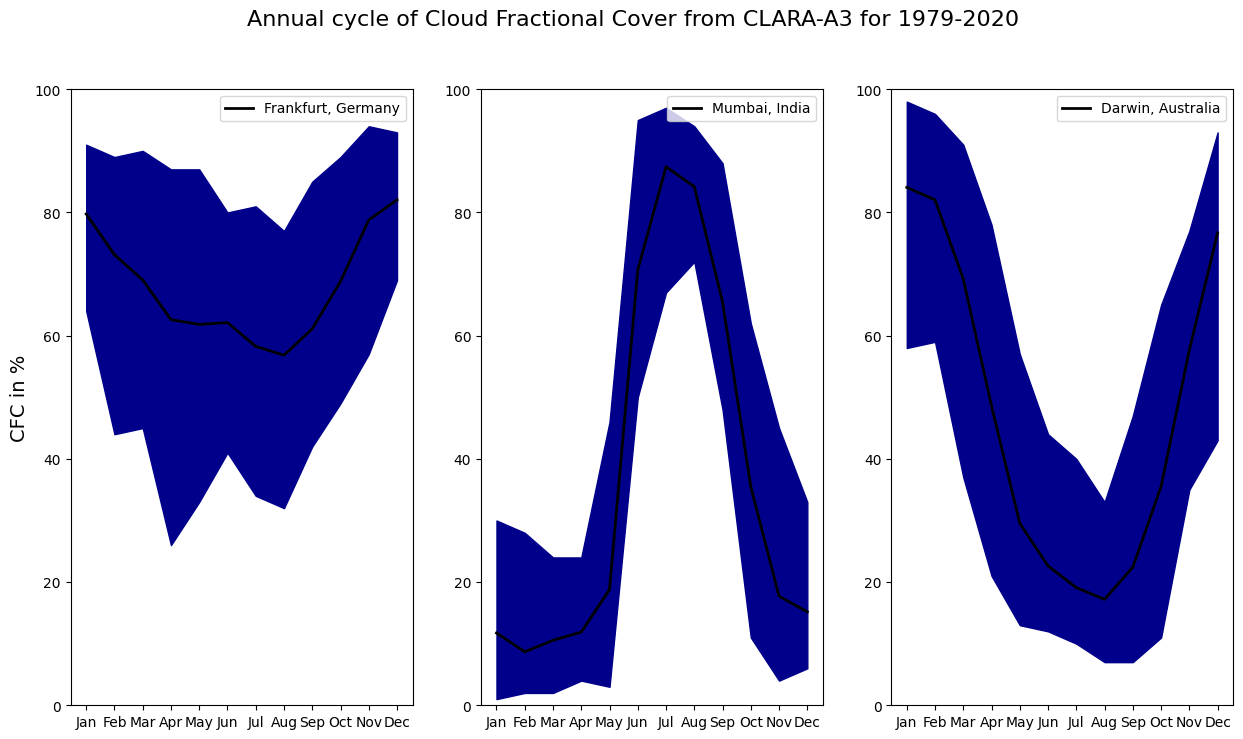

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
fig.suptitle('Annual cycle of Cloud Fractional Cover from CLARA-A3 for 1979-2020', fontsize=16)

for i in range(0, 3):
    
    # Search for the nearest grid point with respect to the entered data
    # Get latitudes of the dataset as array
    latitude_point = np.asarray(dataset_cfc['lat'].values)
    
    # Calculate differences between every latitude and defined latitude for the location (np.abs)
    # Search for the smallest difference (.argmin()) and save the index
    idx_lat = (np.abs(latitude_point - point_lat[i])).argmin()
    
    # Repeat steps for longitude
    longitude_point = np.asarray(dataset_cfc['lon'].values)
    idx_lon = (np.abs(longitude_point - point_lon[i])).argmin()
    
    # Take global dataset and cut for selected location but keep every time step
    # [:,idx_lat,idx_lon]
    point = dataset_cfc['cfc'][:, idx_lat, idx_lon]
    # Convert from xarray to array
    point = point.values
    
    # Calculate annual cycle
    # Define vectors with 12 elements
    cycle = np.arange(0.0, 12.0, 1)
    cycle_max = np.arange(0.0, 12.0, 1)
    cycle_min = np.arange(0.0, 12.0, 1)
    
    # Calculate annual cycle, loop runs 12 times starting with 0 (January) and takes the average
    # of every 12th element to get the average for January. Index 1 averages all Februaries etc.
    # In addition the minimum and maximum of all 42 e.g. Januaries will be calculated
    for j in range(0, 12):
        cycle[j] = np.nanmean(point[j::12])
        cycle_max[j] = np.nanmax(point[j::12])
        cycle_min[j] = np.nanmin(point[j::12])
    
    # Plot data and adjust color, linewidth and label
    ax[i].plot(year, cycle, color='black', label=label[i], linewidth=2)
    
    # Fill space between min and max values
    ax[i].fill_between(year, cycle_min, cycle_max, color='darkblue')
    
    # Set legend, axis-labels and ticks, the y-axis label is just defined for the left/first plot
    ax[i].legend()
    ax[0].set_ylabel('CFC in %', fontsize=14)
    ax[i].set_ylim(0, 100)

# Save figure in defined path and name
plt.savefig(figpath + 'Cycle_' + str(label[i]) + '.png')

# Show plot
plt.show()

**Figure 5:** Averaged annual cycle of cloud fractional cover for three cites: (a) Frankfurt, Germany, (b) Mumbai, India and (c) Darwin, Australia. The calculation is based on CLARA-A3 data from 1979 - 2020. 

Figure 5 shows the mean monthly annual cycle of the fractional cloud cover near to Mumbai, a city situated in the Southwest of India. Mumbai exhibits a very strong seasonal cycle in cloud coverage with averages reaching up to 90% in summer and less than 20% in winter. This is due to the Asian monsoon, advecting dry continental air in winter and moist oceanic air in summer to India. As counterpart to the Asian monsoon, a further figure shows the north Australian monsoon, showing fractional cloud cover data next to Darwin, Australia.

Annual cycles are not only observed in the subtropical monsoon regions, but also e.g. in midlatitudes, although much less pronounced. A further figure depicts the monthly mean cloudiness near to Frankfurt, Germany. The amplitude is considerably smaller, but a slightly larger amount of cloud cover is evident in winter. This can be ascribed to increased cyclonic activity in winter due to particulary large differences in temperatures between the equator and the poles.

The blue shaddow is defined by the minimum and maximum month out of all 42 years (e.g. the lower end of January for Frankfurt is the January from 1979 - 2020 with the least cloud coverage).

## 5. Visualisation of radiative effects of clouds

To demonstrate the basic relation between clouds and radiation, which is why clouds are ascribed a crucial role in the Earth's climate system, Figure 6 presents time-averaged data from the CLARA-A3 dataset on radiation. This dataset was simultaneously compiled with the CLARA-A3 dataset on clouds by EUMETSAT's CM SAF.

### Download and calculation of temporal average of surface downwelling longwave/shortwave radiation

The calculation of the temporal-averaged radiation is similar to the first Use Case but with different variables.

Please click on "Datasets" in the bar at the top and either search for "Surface Radiation Budget" or click on **https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-surface-radiation-budget?tab=overview**. The name of the landing page is **Surface radiation budget from 1979 to present derived from satellite observations**.

Please select in the "Download data" tab the following:

* Product family: CLARA-A3 (CM SAF cLoud, Albedo and surface RAdiation dataset from AVHRR data)
* Origin: EUMETSAT (European Organisation for the Exploitation of Meteorological Satellites)
* Variable: Surface downwelling shortwave flux and Surface downwelling longwave flux
* Climate data record type: Thematic Climate Data Record (TCDR)
* Time aggregation: Monthly mean
* Year: Every year from 1979-2020 (shortcut with "Select all" at the bottom right)
* Month: Every month from January to December (shortcut with "Select all" at the bottom right)
* Geographical area: Whole available region
* Format: Zip file (.zip)

Please click on **Show API request**. Copy & paste the code to your Jupyter Notebook and adjust the last line accordingly.
Watch out to accept the **Terms of use**.

In [15]:
c = cdsapi.Client()

c.retrieve(
    'satellite-surface-radiation-budget',
    {
        'product_family': 'clara_a3',
        'origin': 'eumetsat',
        'variable': [
            'surface_downwelling_longwave_flux', 'surface_downwelling_shortwave_flux',
        ],
        'climate_data_record_type': 'thematic_climate_data_record',
        'time_aggregation': 'monthly_mean',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'format': 'zip',
    },
    f'{datadir}Download/download_srb.zip')

2024-03-14 13:26:18,437 INFO Welcome to the CDS
2024-03-14 13:26:18,438 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-surface-radiation-budget
2024-03-14 13:26:18,696 INFO Request is completed
2024-03-14 13:26:18,697 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-satellite-surface-radiation-budget-be41bbba-3afd-4bcc-a786-ecc649b33d6c.zip to ./Download/download_srb.zip (6.6G)
2024-03-14 13:34:22,974 INFO Download rate 14M/s                                                                                                                                                                                             


Result(content_length=7094273047,content_type=application/zip,location=https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-satellite-surface-radiation-budget-be41bbba-3afd-4bcc-a786-ecc649b33d6c.zip)

The next steps are a repeat of the way the cloud fractional cover data was processed before:
- Unzip the files
- Create list with files
- Read file list via "xr.open_mfdataset"
- Temporal average of data

In [16]:
with zipfile.ZipFile(datadir + 'Download/download_srb.zip', 'r') as zip_ref:
    zip_ref.extractall(datadir + 'Data/SRB/')

In [17]:
file = datadir + 'Data/SRB/SDLmm*.nc'
dataset_sdl = xr.open_mfdataset(file, combine='nested', concat_dim='time')

file = datadir + 'Data/SRB/SISmm*.nc'
dataset_sis = xr.open_mfdataset(file, combine='nested', concat_dim='time')

In [18]:
# Calculate temporal average of dataset_sdl/sis and corresponding variables, np.nanmean averages and
# ignores nan's
average_sdl = np.nanmean(dataset_sdl['SDL'], axis=0)
average_sis = np.nanmean(dataset_sis['SIS'], axis=0)

### Plot of the temporal average of surface downwelling longwave/shortwave radiation

Similar to Use Case 2 more than one figure will be created. This gives us the chance to use a loop with two runs. A set of vectors with two entries is created below, using the first entry for SDL and the second entry for SIS.

In [19]:
data = [average_sdl, average_sis]
title = ['Mean Surface Downwelling Longwave Radiation from CLARA-A3 for 1979-2020',
         'Mean Surface Downwelling Shortwave Radiation from CLARA-A3 for 1979-2020']
var = ['SDL', 'SIS']
cbar_text = ['Surface Downwelling Longwave Radiation (W/m²)',
             'Surface Incoming Shortwave Radiation (W/m²)']
lowerlimit = [50, 0]
upperlimit = [500, 320]

Following the visualisation takes place with a similar setup compared to Use Case 1. The loop makes sure everything happens twice for Surface Downwelling Longwave Radiation and Surface Downwelling Shortwave Radiation. 

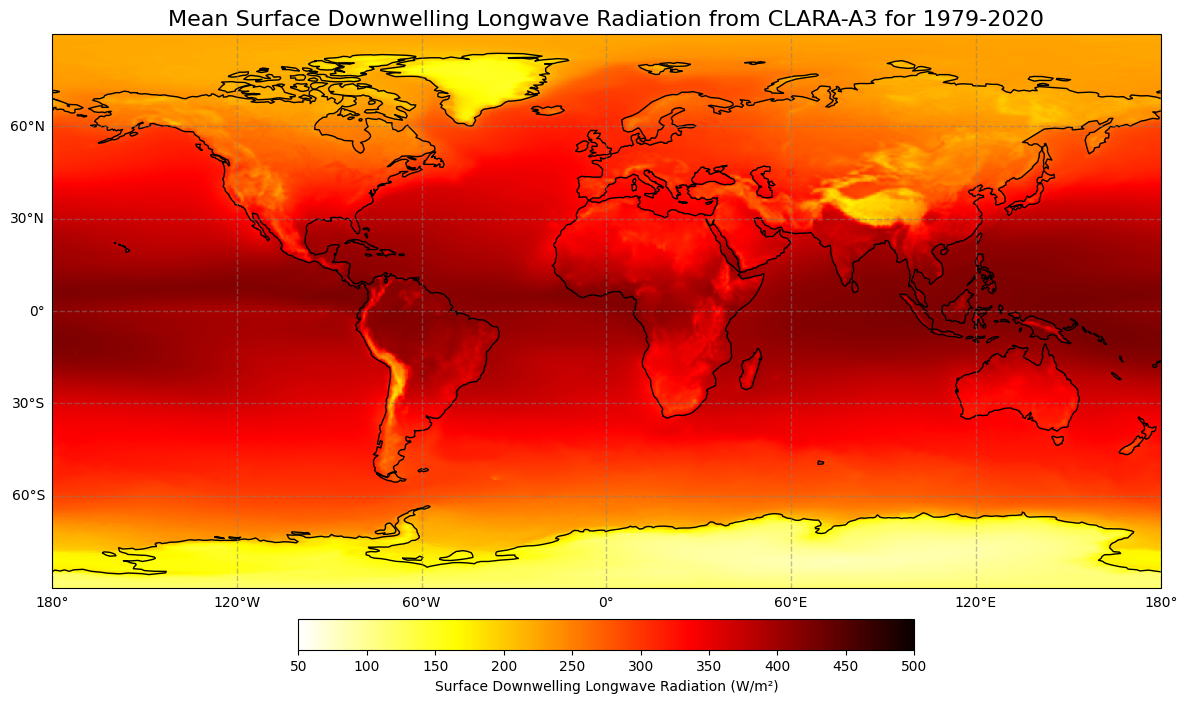

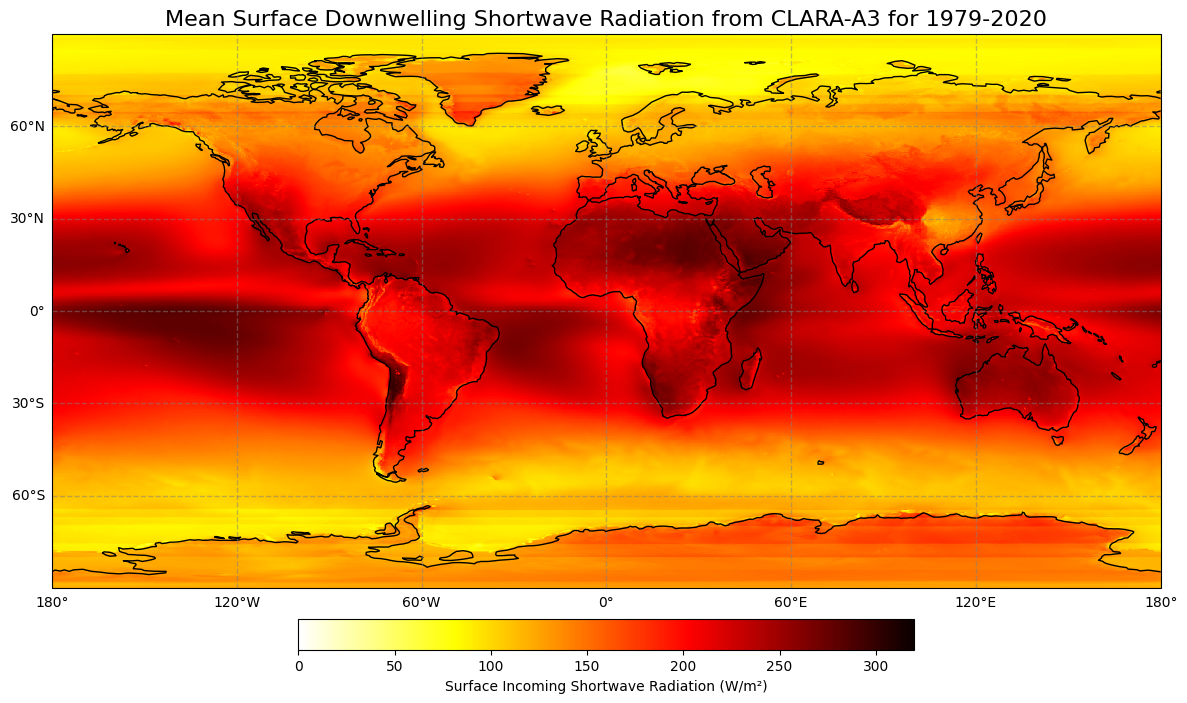

In [20]:
for i in range(0, 2):
    
    # Create figure and size
    fig = plt.figure(figsize=(15, 8))
    
    # Create the figure panel and define the Cartopy map projection (PlateCarree)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # Plot the data and set colorbar, minimum and maximum values
    im = plt.pcolormesh(lon, lat, data[i], cmap='hot_r', vmin=lowerlimit[i], vmax=upperlimit[i])
    
    # Set title and size
    ax.set_title(title[i], fontsize=16)
    
    # Define gridlabels and lines
    gl = ax.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xlines = True
    gl.ylines = True
    
    # Set coastlines
    ax.coastlines()
    
    # Set colorbar and adjust size, location and text
    cbar = plt.colorbar(im, fraction=0.05, pad=0.05, orientation='horizontal')
    cbar.set_label(cbar_text[i])
    
    # Save figure in defined path and name
    plt.savefig(figpath + 'Radiation_' + str(var[i]) + '.png')
    
    # Show plot
    plt.show()

**Figure 6:** Global climatology of surface downwelling longwave (top) and surface incoming shortwave radiation (bottom) from 1979 - 2020 based on EUMETSAT'S CM SAF CLARA-A3 dataset.

Figure 6 shows the mean incoming long- and shortwave radiation at the Earth's surface. It can nicely be linked to the mean fractional cloud cover in Figure 4, especially in regions where solar insolation is particulary high, mainly near the equator. As clouds reflect great parts of solar (shortwave) radiation, regions with low values of shortwave radiation at the surface correspond to regions with high fractional cloud cover in the mean. Clouds act as kind of mirrors, preventing solar radiation from reaching the Earth's surface. 

At the same time, clouds also prevent terrestrial (longwave) radiation, i.e. heat, from passing back into space. Thus, many spots of high cloud coverage correspond to high values of incomming longwave radiation, and vice versa. Clouds act like a blanket, trapping some of the energy the Earth emits. That is why starry nights usually become colder than cloudy ones.

Hence, clouds play a dual role for the Earth's energy budget: They have both a cooling and a warming radiative impact. Their net effect strongly depends on the cloud's physical properties and their height. Usually, high clouds tend to have a net warming effect on the earth, whereas mid- and low-level clouds rather cool it. Globally and annually, the shortwave effect of clouds overweights the longwave one, by abouth 20 W/m² at present (5th IPCC assessment report, chapter 7.2.1).

## 6. References

5th IPCC assessment report, chapter 7:

Boucher, O., D. Randall, P. Artaxo, C. Bretherton, G. Feingold, P. Forster, V.-M. Kerminen, Y. Kondo, H. Liao, U.
Lohmann, P. Rasch, S.K. Satheesh, S. Sherwood, B. Stevens and X.Y. Zhang, 2013: Clouds and Aerosols. In: _Climate
Change 2013: The Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the
Intergovernmental Panel on Climate Change_ [Stocker, T.F., D. Qin, G.-K. Plattner, M. Tignor, S.K. Allen, J. Boschung, A. Nauels, Y. Xia, V. Bex and P.M. Midgley (eds.)]. Cambridge University Press, Cambridge, United Kingdom and
New York, NY, USA